# Import Data

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import metrics
import matplotlib.pyplot as plt
import sys
from sqlalchemy import create_engine
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import numpy as np 


account = pd.read_csv("data/account.csv", sep=";")
card = pd.read_csv("data/card_dev.csv", sep=";")
client = pd.read_csv("data/client.csv", sep=";")
disposition = pd.read_csv("data/disp.csv", sep=";")
demograph = pd.read_csv("data/district.csv",sep=";")
loan = pd.read_csv("data/loan_dev.csv", sep=";")
transactions = pd.read_csv("data/trans_dev.csv",sep=";", low_memory=False)
merged_data = pd.read_csv("refined/final_data.csv", sep=";")

print(merged_data.shape)

(30373, 29)


# Split Data

In [2]:
def split_data(X, y, test_size):
    return train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

# Sampling

In [3]:
def smote_sampling(X_train, y_train):
    sm = SMOTE(random_state=42)
    return sm.fit_resample(X_train, y_train)

# Fit and Predict

In [4]:
def fit_and_predict(model, X_train, y_train, X_test):
    model = model.fit(X_train, y_train)
    prediction = model.predict(X_test)

    return prediction

# Calculate Statistics

In [5]:

def calculate_statistics(y_test, pred):
    accuracy = metrics.accuracy_score(y_test, pred)
    precision = metrics.precision_score(y_test, pred)
    recall = metrics.recall_score(y_test, pred)
    f1_score1 = metrics.f1_score(y_test, pred)
    aoc = metrics.roc_auc_score(y_test, pred)
    log_loss = metrics.log_loss(y_test, pred)
    
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1_score1}")
    print(f"AOC: {aoc}")
    print(f"Log Loss: {log_loss}")

# Confusion Matrix

In [6]:
def display_conf_matrix_graph(y_test, pred):
    conf_matrix = confusion_matrix(y_test, pred)
    
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["Not Paid", "Paid"])
    cm_display.plot()

# Aplication of a models

## Decision Tree

### Features : amount, duration and payments


Accuracy: 0.7070707070707071
Precision: 0.9027777777777778
Recall: 0.7471264367816092
F1-Score: 0.8176100628930817
AOC: 0.5818965517241379
Log Loss: 10.117475885196171


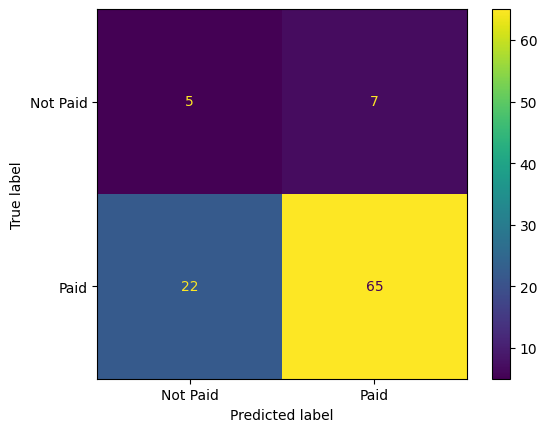

In [7]:

features = ['amount', 'duration', 'payments']
X = loan[features]
y = loan["status"]

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

dTree = DecisionTreeClassifier()
prediction = fit_and_predict(dTree, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

### Features : merged data collumns names without string collumns that are not numerical

#### Merged Data

In [8]:

# exclude non-numeric columns
merged_data = merged_data.select_dtypes(exclude=['object'])
get_collumns_names = list(merged_data)
# drop loan_status 
for index in range(len(get_collumns_names)):
    if(get_collumns_names[index] == 'loan_status'):
        del get_collumns_names[index]
        break
print(get_collumns_names)
merged_data
save_loan_status = merged_data['loan_status']

['loan_id', 'loan_amount', 'loan_duration', 'loan_payments', 'loan_year', 'client_id', 'birth_year', 'client_age', 'client_gender', 'account_frequency', 'account_year', 'region', 'ratio of urban inhabitants ', 'average salary ', 'criminal growth', 'unemploymant growth', 'enterpreuners ratio', 'trans_amount', 'trans_balance', 'trans_year', 'trans_month', 'trans_day', 'age on loan', 'account age at loan']


Features:  ['loan_id', 'loan_amount', 'loan_duration', 'loan_payments', 'loan_year', 'client_id', 'birth_year', 'client_age', 'client_gender', 'account_frequency', 'account_year', 'region', 'ratio of urban inhabitants ', 'average salary ', 'criminal growth', 'unemploymant growth', 'enterpreuners ratio', 'trans_amount', 'trans_balance', 'trans_year', 'trans_month', 'trans_day', 'age on loan', 'account age at loan']
Accuracy: 0.713784021071115
Precision: 0.9384406983744732
Recall: 0.7392696229547071
F1-Score: 0.8270327629659104
AOC: 0.5680123925982975
Log Loss: 9.885585587497367


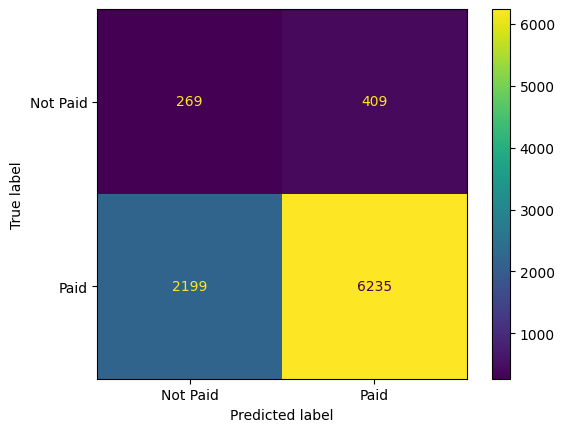

In [9]:

y = merged_data["loan_status"]
# drop loan_status from features ( obviously )
merged_data.drop(columns=["loan_status"], axis=1, inplace=True)

features = get_collumns_names
print("Features: ", features)
X = merged_data[features]

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

dTree = DecisionTreeClassifier()
prediction = fit_and_predict(dTree, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

We need to separate date birth day in 3 columns: day, month and year. 
We need to transform the categorical data in numerical data ( all ?!?)
Do this on data preparation and use refined data on data understanding.
The merged data, need to be sorted by date of loan ascending order. ( See this )

### Features : ft_feature_matrix_enc_md_2 from preparation phase

Accuracy: 0.9494949494949495
Precision: 0.9659090909090909
Recall: 0.9770114942528736
F1-Score: 0.9714285714285714
AOC: 0.8635057471264368
Log Loss: 1.7444068764327685


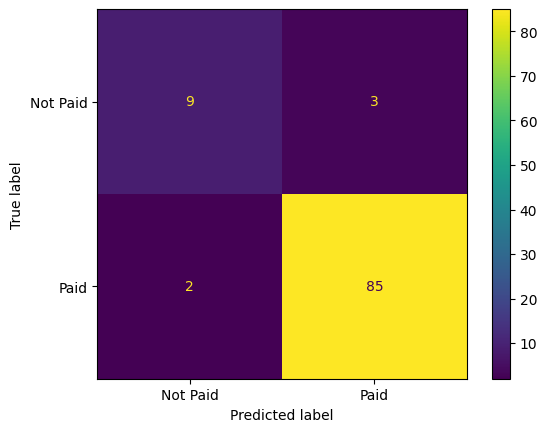

In [10]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
ft_feature_matrix_enc_md_2 = pd.read_csv("refined/ft_df_mms_md_2.csv", sep=";", low_memory=False)
# drop loan_status from features ( obviously )
ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna(axis="columns", how="any")

features = ft_feature_matrix_enc_md_2.columns
features = features.dropna()

y=ft_feature_matrix_enc_md_2["loan_status"].copy()
#print(y)
X = ft_feature_matrix_enc_md_2.drop(columns=["loan_status"], axis=1, inplace=False)

#print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42, shuffle=False)

X_train, y_train = smote_sampling(X_train, y_train)

dTree = DecisionTreeClassifier( random_state=42, criterion="entropy", max_features='sqrt', min_samples_leaf=1, min_samples_split=2)
prediction = fit_and_predict(dTree, X_train, y_train, X_test)
pred_prob1 = dTree.predict_proba(X_test)
#print(pred_prob1)
#print(y_test)



calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

## Logistic Regression

### Features : amount, duration and payments

Accuracy: 0.494949494949495
Precision: 0.8627450980392157
Recall: 0.5057471264367817
F1-Score: 0.6376811594202899
AOC: 0.46120689655172414
Log Loss: 17.443882999268137


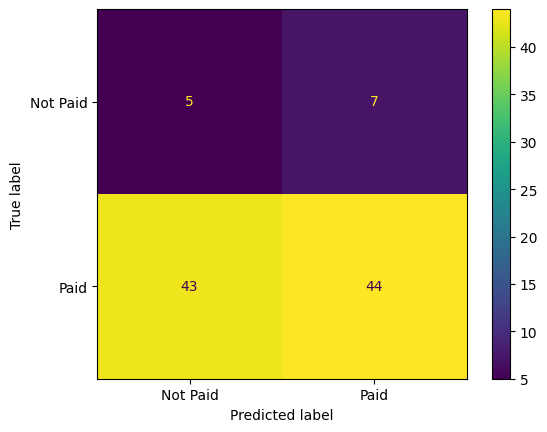

In [11]:
features = ['amount', 'duration', 'payments']
X = loan[features]
y = loan["status"]

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

logistic_regression = LogisticRegression()
prediction = fit_and_predict(logistic_regression, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

### Features : merged data collumns names without string collumns that are not numerical

In [12]:

y = save_loan_status
features = get_collumns_names
print("Features: ", features)
X = merged_data[features]

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

dTree = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42, shuffle=False)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

Features:  ['loan_id', 'loan_amount', 'loan_duration', 'loan_payments', 'loan_year', 'client_id', 'birth_year', 'client_age', 'client_gender', 'account_frequency', 'account_year', 'region', 'ratio of urban inhabitants ', 'average salary ', 'criminal growth', 'unemploymant growth', 'enterpreuners ratio', 'trans_amount', 'trans_balance', 'trans_year', 'trans_month', 'trans_day', 'age on loan', 'account age at loan']


ValueError: Found input variables with inconsistent numbers of samples: [9112, 99]

### Features : ft_feature_matrix_enc_md_2 from preparation phase

/tmp/ipykernel_115511/2445981795.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="any")
/home/wolfcuanhamarws/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


LogisticRegression:
Accuracy: 0.48484848484848486
Precision: 0.8387096774193549
Recall: 0.4727272727272727
F1-Score: 0.6046511627906976
AOC: 0.509090909090909
Log Loss: 17.792763566880517
SGDClassifier:
Accuracy: 0.6666666666666666
Precision: 0.8367346938775511
Recall: 0.7454545454545455
F1-Score: 0.7884615384615385
AOC: 0.5090909090909091
Log Loss: 11.513022385870858


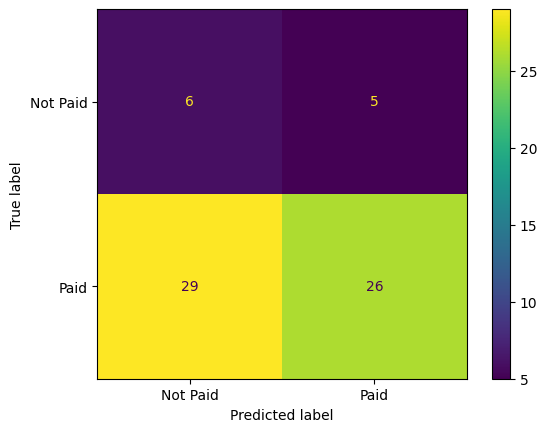

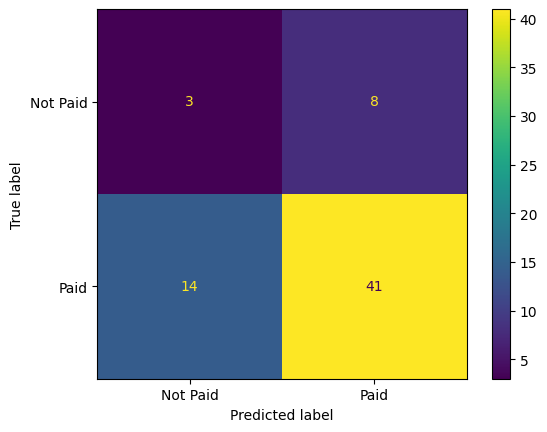

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
# import noise layer
# import keras as kr
# from kera import GaussianNoise
# define noise layer
#layer = GaussianNoise(0.1)
ft_feature_matrix_enc_md_2 = pd.read_csv("refined/ft_df_mms_md_2.csv", sep=";", low_memory=False)
# drop loan_status from features ( obviously )
ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="any")
ft_feature_matrix_enc_md_2.sort_values(by=['loan_year'], inplace=True)
features = ft_feature_matrix_enc_md_2.columns


# use Elastic Net !?

y=ft_feature_matrix_enc_md_2["loan_status"].copy()

X = ft_feature_matrix_enc_md_2.drop(columns=["loan_status"], axis=1, inplace=False)
#print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42, shuffle=False)

X_train, y_train = smote_sampling(X_train, y_train)

lR = LogisticRegression()
predictionlr = fit_and_predict(lR, X_train, y_train, X_test)
pred_prob1 = lR.predict_proba(X_test)


clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=1)
predictionclf = fit_and_predict(clf, X_train, y_train, X_test)
#print(pred_prob1)
#print(y_test)
#print(X_test)



print("LogisticRegression:")
calculate_statistics(y_test, predictionlr)
display_conf_matrix_graph(y_test, predictionlr)
print("SGDClassifier:")
calculate_statistics(y_test, predictionclf)
display_conf_matrix_graph(y_test, predictionclf)

## Support Vector Machine Linear and non-linear

### Features : amount, duration and payments

In [ ]:
from sklearn import svm
features = ['amount', 'duration', 'payments']
X = loan[features]
y = loan["status"]
X= X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

# Default values for C and gamma
svm_linear = svm.SVC(kernel='linear')
prediction = fit_and_predict(svm_linear, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

KeyboardInterrupt: 

### Features : ft_feature_matrix_enc_md_2 from preparation phase

/tmp/ipykernel_9346/1412008413.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="any")


SVM: non-linear
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
AOC: 1.0
Log Loss: 9.992007221626415e-16
SVM: linear
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
AOC: 1.0
Log Loss: 9.992007221626415e-16


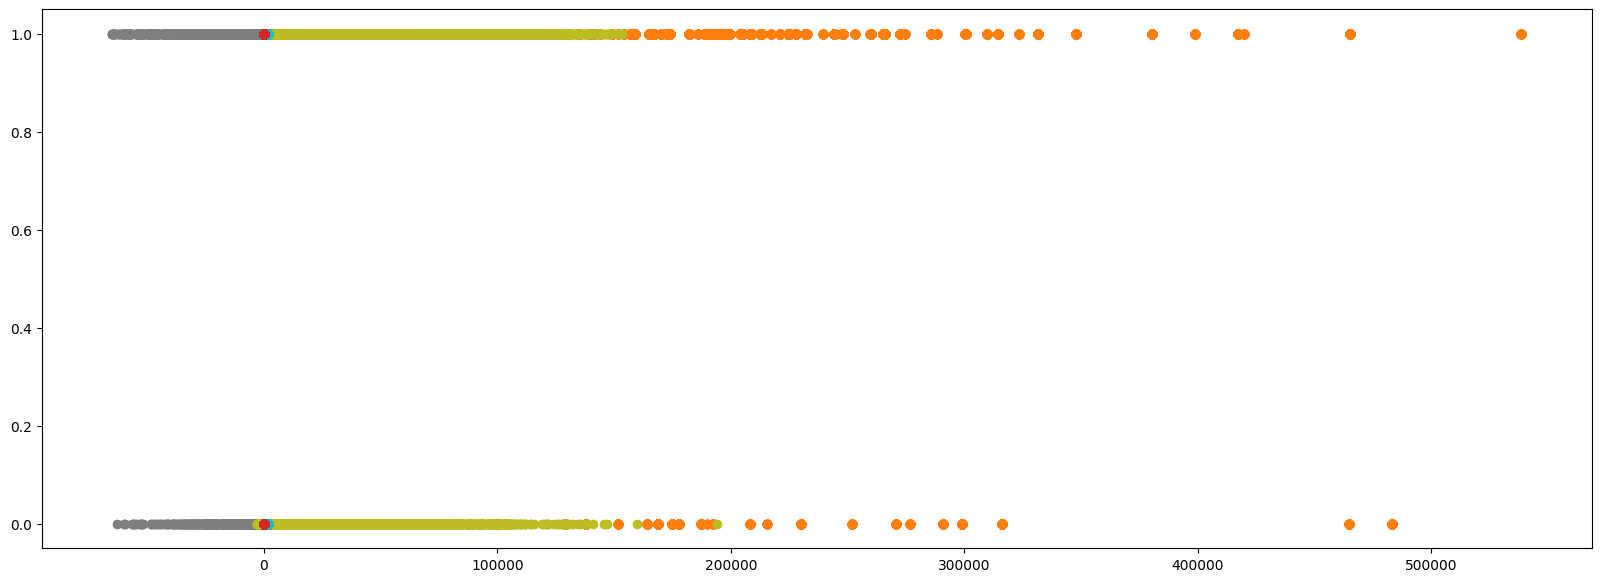

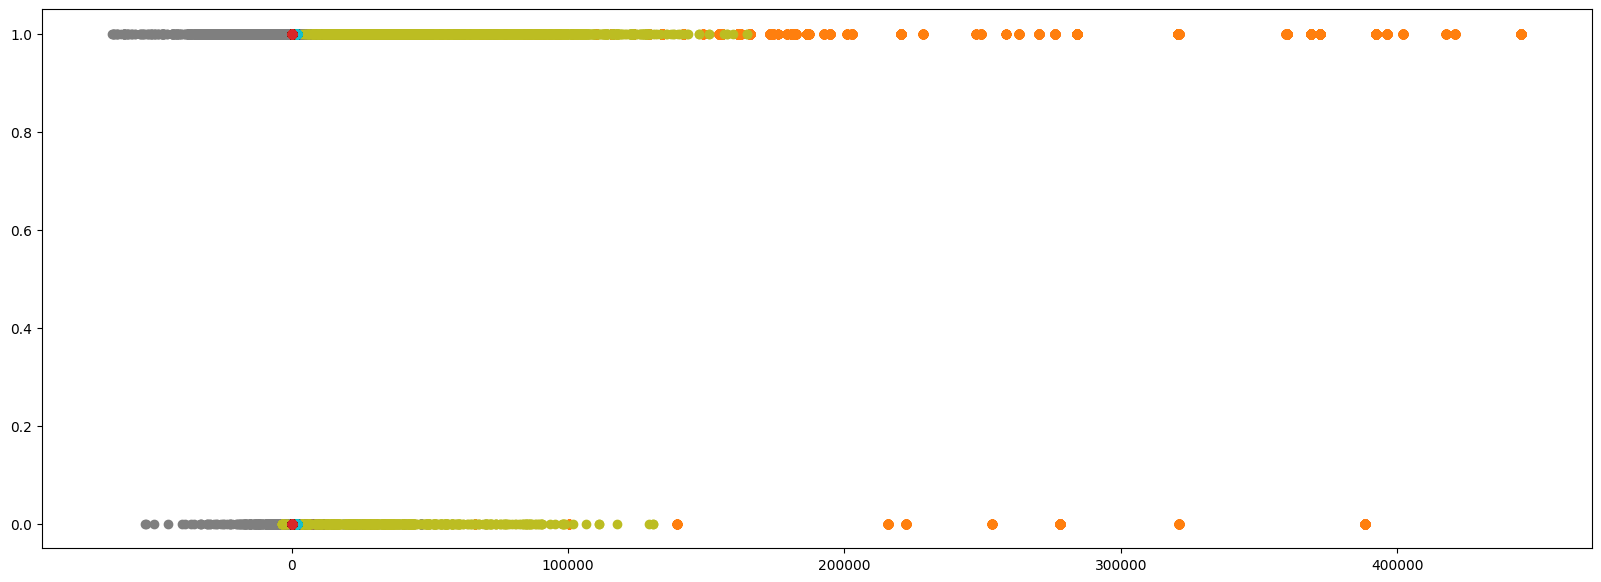

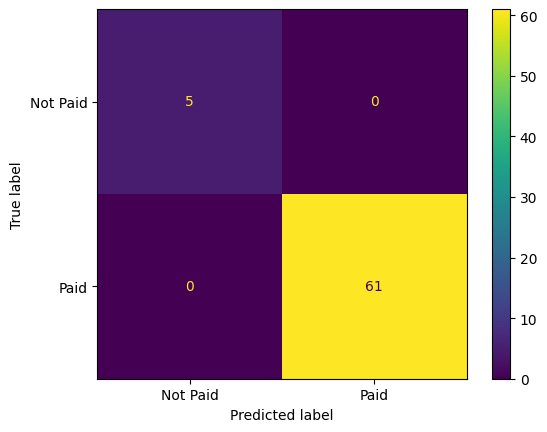

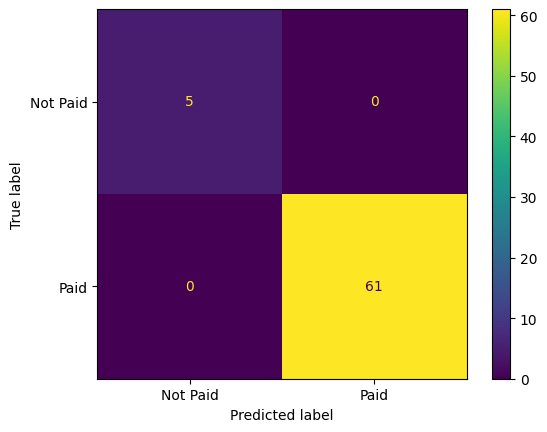

In [13]:
from sklearn.model_selection import train_test_split, KFold, TimeSeriesSplit
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from modeling_utils import *
%matplotlib inline
ft_feature_matrix_enc_md_2 = pd.read_csv("refined/ft_df_mms_md_2.csv", sep=";", low_memory=False)
# drop loan_status from features ( obviously )
ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="any")

features = ft_feature_matrix_enc_md_2.columns
features = features.dropna()


X = ft_feature_matrix_enc_md_2.drop(columns=["loan_status"], axis=1, inplace=False)
y=ft_feature_matrix_enc_md_2["loan_status"].copy()


#Prepare cross validation on Time Series 


# plot training sets and test sets
plt.figure(figsize=(20,7))
plt.plot(X_train, y_train, 'o')

plt.figure(figsize=(20,7))
plt.plot(X_test, y_test, 'o')

#split training data int five folds
K = 3
# blkts = BlockingTimeSeriesSplit(n_splits=K)

# for train_index, test_index in blkts.split(X):
#     print("Train:", train_index, "TEST:", test_index) 
#     cv_train, cv_test = X[train_index], X[test_index]
#     y_cv_train, y_cv_test = y[train_index], y[test_index]

X_train, y_train = smote_sampling(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42, shuffle=False)
svm_rbf = svm.SVC(kernel='rbf')
prediction = fit_and_predict(svm_rbf, X_train, y_train, X_test)

print("SVM: non-linear")
calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

svm_linear = svm.SVC(kernel='linear')
prediction = fit_and_predict(svm_linear, X_train, y_train, X_test)
print("SVM: linear")
calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

A good idea is to tunne C, Gamma and Kernel parameters ( and others) depending on the data and the chosen SVM model.

### Features : merged data collumns names without string collumns that are not numerical

In [ ]:
y = save_loan_status
features = get_collumns_names
print("Features: ", features)
X = merged_data[features]
X= X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

# Default values for SVM linear parameters
svm_linear = svm.SVC(kernel="linear")
prediction = fit_and_predict(svm_linear, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

## Support Vector Machine - Non Linear

### Features : amount, duration and payments

Accuracy: 0.48484848484848486
Precision: 0.8913043478260869
Recall: 0.47126436781609193
F1-Score: 0.6165413533834586


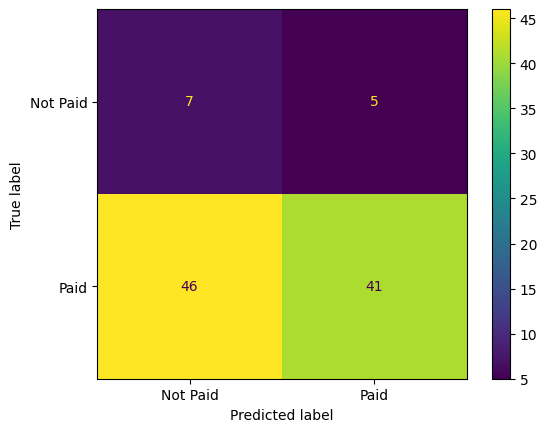

In [ ]:
features = ['amount', 'duration', 'payments']
X = loan[features]
y = loan["status"]
# Use numpy matrix to improve performance
X= X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

# Default values for SVM non-linear parameters
svm_non_linear = svm.SVC(kernel="rbf")
prediction = fit_and_predict(svm_non_linear, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

What is happening with the data? Why the model is not working?

### Features : merged data collumns names without string collumns that are not numerical

In [ ]:
y = save_loan_status
features = get_collumns_names
print("Features: ", features)
X = merged_data[features]
X= X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

# Default values for SVM non-linear parameters
svm_non_linear = svm.SVC(kernel="rbf")
prediction = fit_and_predict(svm_non_linear, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

NameError: name 'save_loan_status' is not defined

We need parameters tuning and better feature selection, data preparation and or data understanding.
Check on all models what is the positive and negative class and the confusion matrix not random ! Data sorted by date of loan ascending order. ( See this )
Experimentar várias estratégias de sampling, como por exemplo, undersampling, oversampling, SMOTE, etc.
Validatin after test, not before. ( See this ) ?!!?
Featuring enginnering, feature selection !!!! ( See this )
Descriptive modeling : clustering, PCA, etc. ( See this )
No fundo: passar por todos os passos das teóricas de data mining, e ver o que se pode fazer para melhorar os resultados. ( See this )
Tests with different models, and different parameters. ( See this )
Tests need to be about loans in the future comparing with the data training !!!!
New feature: loan amount / duration
New feature: loan amount / payments
New feature: loan amount / payments / duration
New feature: number of clients with the same account with loan
New feature: try to calculate "taxa de esforço" ou algo parecido
New feature : get month balance, calculate the average and compare with the loan month payment -> sum the value of the loan payment
Maybe delete the type of transaction !!!
-> See the formulas used by banks !!!
See account_frequency: meaning and maybe changing to numerical values

In [ ]:
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
ft_feature_matrix_enc_md_2 = pd.read_csv("refined/ft_df_mms_md_2.csv", sep=";", low_memory=False)
# drop loan_status from features ( obviously )
ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="any")

features = ft_feature_matrix_enc_md_2.columns
features = features.dropna()

y=ft_feature_matrix_enc_md_2["loan_status"].copy()

X = ft_feature_matrix_enc_md_2.drop(columns=["loan_status"], axis=1, inplace=False)
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42, shuffle=False)

X_train, y_train = smote_sampling(X_train, y_train)
model= KNeighborsClassifier(n_neighbors=1)
prediction = fit_and_predict(model, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

/tmp/ipykernel_395924/3601622644.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="any")


     loan_amount  loan_duration  loan_payments  loan_year  \
0      -0.141304           -1.0       1.173919       -1.0   
1       0.392686            0.0       0.206697       -1.0   
2       0.094234            1.0      -0.497457       -1.0   
3      -0.069086            0.0      -0.265470       -1.0   
4       1.227708            1.0       0.197937       -1.0   
..           ...            ...            ...        ...   
323     0.313283            0.5      -0.179853        0.5   
324     0.824245            1.0      -0.049590        0.5   
325    -0.535648            0.5      -0.830884        0.5   
326     0.007738            0.0      -0.186917        0.5   
327     0.112104           -0.5       0.427663        0.5   

     account.account_frequency  account.account_year  account_id = 11362  \
0                          1.0                  -0.5                 0.0   
1                          0.0                  -0.5                 0.0   
2                          0.0         

ValueError: pos_label=1 is not a valid label. It should be one of [-1.0, 0.0]